<a href="https://colab.research.google.com/github/Manideep230/movie-ticket-booking/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise 1

**Aim :** Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given
set of training data samples. Read the training data from a .CSV file.

**Description :** The following implementation demonstrates the FIND-S algorithm, which helps to find the most specific hypothesis that matches all positive examples in a training set.

**Steps :**
1. Initialization : Starts with most specific hypothesis.
2. Reading training data : Loads data from a .csv file.
3. First positive instance : Set the hypothesis initially to the first positive instance.
4. Update Hypothesis : For each +ve instance generalize the hypothesis by replacing differing attributes with '?' and Ignore all the -ve instances.
5. Output : Prints the final specific hypothesis.

In [ ]:
import numpy as np
import pandas as pd
import csv
num_attributes=6
print("\n The Given Training Data Set \n")
data=pd.read_csv('weather.csv')
print(data)
print("\n The Initial value of hypothesis: \n")
hypothesis=['0']*num_attributes
print(hypothesis)
for j in range (0,num_attributes):
  hypothesis[j]=data.iloc[0][j]
print("\n Find S: Finding a maximally specific hypothesis \n")
for i in range(0,4):
  if data.iloc[i][num_attributes]=='Yes':
    for j in range(0,num_attributes):
      if data.iloc[i][j]!=hypothesis[j]:
        hypothesis[j]='?'
      else:
        hypothesis[j]=data.iloc[i][j]
  print("For training instance no:(0) the hypothesis is", format(i),hypothesis)
print("\n The maximally specific hypothesis for the given training instances is: \n")
print(hypothesis)


 The Given Training Data Set 

     Sky Air_Temp Humidity    Wind Water Forecast Enjoy_Sport
0  Sunny     Warm   Normal  Strong  Warm     Same         Yes
1  Sunny     Warm     High  Strong  Warm     Same         Yes
2  Rainy     Cold     High  Strong  Warm   Change          No
3  Sunny     Warm     High  Strong  Cool   Change         Yes

 The Initial value of hypothesis: 

['0', '0', '0', '0', '0', '0']

 Find S: Finding a maximally specific hypothesis 

For training instance no:(0) the hypothesis is 0 ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
For training instance no:(0) the hypothesis is 1 ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
For training instance no:(0) the hypothesis is 2 ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
For training instance no:(0) the hypothesis is 3 ['Sunny', 'Warm', '?', 'Strong', '?', '?']

 The maximally specific hypothesis for the given training instances is: 

['Sunny', 'Warm', '?', 'Strong', '?', '?']


# Exercise 2


**Aim :** For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-
Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.

**Description :** This uses the Candidate Elimination algorithm to learn hypothesis fro a dataset. It imports numpy and pandas, loads weather.csv, and extracts features ('concepts') and targets ('target'). The algorithm initializes with the first instance as the specific hypothesis('specific_h')and the most general hypothesis('general_h'). It updates specific_h and general_h based on whether each  instance is positive or negative, refining the hypothesis accordingly. Finally, it prints the specific hypothesis and the set of general hypothesis.

In [ ]:
import numpy as np
import pandas as pd
import csv
data=pd.read_csv('weather.csv')
print("The dataset is: \n")
print(data)
concepts=np.array(data.iloc[:,0:-1])
target=np.array(data.iloc[:,-1])
print("\n The target values are: ",target)
def learn(concepts,target):
  specific_h=concepts[0].copy()
  print("\n Initialisation of specific_h and general_h")
  print("\n Specific boundaries: ",specific_h)
  general_h=[['?' for i in range(len(specific_h))]
             for i in range(len(specific_h))]
  print("\n General boundaries: ",general_h)
  for i,h in enumerate(concepts):
    print("\n Instance",i+1,"is ",h)
    if target[i]=='Yes':
      print("Instance is Positive")
      for x in range(len(specific_h)):
        if h[x]!=specific_h[x]:
          specific_h[x]='?'
          general_h[x][x]='?'
    if target[i]=='No':
      print("Instance is Negative")
      for x in range(len(specific_h)):
        if h[x]!=specific_h[x]:
          general_h[x][x]=specific_h[x]
        else:
          general_h[x][x]='?'
    print("Specific Boundary after",i+1,"Instance: ",specific_h)
    print("General Boundary after",i+1,"Instance: ",general_h)
    print("\n")
  indices=[i for i,val in enumerate(general_h) if val==['?','?','?','?','?','?']]
  for i in indices:
    general_h.remove(['?','?','?','?','?','?'])
  return specific_h,general_h
s_final,g_final=learn(concepts,target)
print("Final specific_h: ",s_final,sep="\n")
print("Final general_h: ",g_final,sep="\n")

The dataset is: 

     Sky Air_Temp Humidity    Wind Water Forecast Enjoy_Sport
0  Sunny     Warm   Normal  Strong  Warm     Same         Yes
1  Sunny     Warm     High  Strong  Warm     Same         Yes
2  Rainy     Cold     High  Strong  Warm   Change          No
3  Sunny     Warm     High  Strong  Cool   Change         Yes

 The target values are:  ['Yes' 'Yes' 'No' 'Yes']

 Initialisation of specific_h and general_h

 Specific boundaries:  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']

 General boundaries:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

 Instance 1 is  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
Instance is Positive
Specific Boundary after 1 Instance:  ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
General Boundary after 1 Instance:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?

# Exercise 3

**Aim :** Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

**Description :** Decision tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression classification problems too. The goal of decision tree is to create a training model  that can used to predict the class by learning simple decision tree.

[Text(0.5921052631578947, 0.9375, 'concavity_worst <= 0.142\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.2894736842105263, 0.8125, 'perimeter_se <= 35.26\nentropy = 0.402\nsamples = 263\nvalue = [242, 21]'),
 Text(0.10526315789473684, 0.6875, 'concavity_worst <= 0.093\nentropy = 0.149\nsamples = 234\nvalue = [229, 5]'),
 Text(0.05263157894736842, 0.5625, 'entropy = 0.0\nsamples = 173\nvalue = [173, 0]'),
 Text(0.15789473684210525, 0.5625, 'concavity_se <= 0.007\nentropy = 0.409\nsamples = 61\nvalue = [56, 5]'),
 Text(0.10526315789473684, 0.4375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.21052631578947367, 0.4375, 'radius_worst <= 32.78\nentropy = 0.29\nsamples = 59\nvalue = [56, 3]'),
 Text(0.10526315789473684, 0.3125, 'concavity_worst <= 0.138\nentropy = 0.129\nsamples = 56\nvalue = [55, 1]'),
 Text(0.05263157894736842, 0.1875, 'entropy = 0.0\nsamples = 53\nvalue = [53, 0]'),
 Text(0.15789473684210525, 0.1875, 'perimeter_mean <= 579.7\nentropy = 0.918\ns

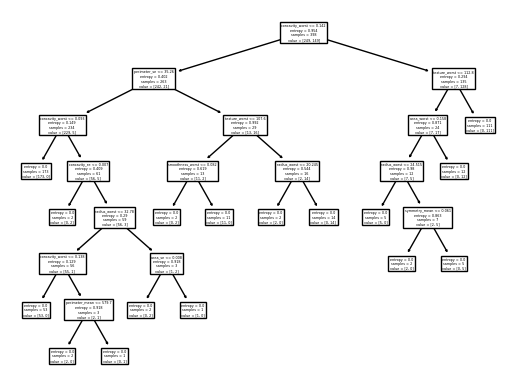

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
data=pd.read_csv('cancer.csv')
data.isnull()
x=data.iloc[:,1:].values
y=data.iloc[:,0].values
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
model=DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
features=data.columns
tree.plot_tree(model,feature_names=features)

In [ ]:
y_pred=model.predict(x_test)
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[102   6]
 [  4  59]]


In [ ]:
print("\n",metrics.classification_report(y_test,y_pred))


               precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.91      0.94      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



# Exercise 4a

**Aim :** Exercises to solve the real-world problems using the following machine learning methods: a) Linear Regression

**Description :** Linear progression is a machine learning algorithm that predicts a continuous output variable based on one or more input features. It models the relationship between inputs and outputs as a linear equation, using coefficients learned from training data. The goal is to minimize the difference between predicted and actual outputs, making it widely used technique for regression tasks, such as predicting prices, temperatures or stock prices.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
data=pd.read_csv('LinearRegression.csv')

In [ ]:
model=LinearRegression()

In [ ]:
x = data.iloc[:,0].values.reshape(-1, 1)
y = data.iloc[:,1].values.reshape(-1, 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
model.fit(x_train, y_train)
print(model.intercept_, model.coef_)

[14.13648289] [[1.608535e-09]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred=model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

2.6780960732778447
11.077772342423254


# Exercise -4b

**Aim :** Exercises to solve the real-world problems using the following machine learning methods: b) Logistic Regression

**Description :** This code applies logistic regression to the Framingham dataset for binary classification. It begins by loading the data, imputing missing values with the mean, and splitting it into training and test sets. After fitting the model on the training data, it predicts outcomes on the test set. The model’s performance is evaluated using accuracy, confusion matrix, and classification report, providing insights into how well it predicts the target variable.

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('framingham.csv')

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-0.10792536]
Coefficients: [[ 0.09387798  0.02263569 -0.33462593 -0.06853037  0.0199909   0.03956369
   0.02374361  0.2774045   0.06198638 -0.00189393  0.01931358 -0.02858375
  -0.03195486 -0.02201889  0.00365204]]


In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8459119496855346
Confusion Matrix:
 [[1073    1]
 [ 195    3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1074
           1       0.75      0.02      0.03       198

    accuracy                           0.85      1272
   macro avg       0.80      0.51      0.47      1272
weighted avg       0.83      0.85      0.78      1272



# Exercise 4c

**Aim :** Exercises to solve the real-world problems using the following machine learning methods: c) Binary Classifier

**Description :** This code builds a logistic regression model on the Framingham dataset. It handles missing values using mean imputation, splits the data into training and test sets, and fits the model. Predictions on the test data are evaluated using accuracy, confusion matrix, and classification report to assess performance.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Load the synthetic binary classification dataset
data = pd.read_csv('BinaryClassificationDataset.csv')

# Separate features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column as the target

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print model parameters (intercept and coefficients)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using accuracy, confusion matrix, and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Intercept: [0.14001128]
Coefficients: [[ 0.04805865 -0.58824988  0.17754951  0.03859016  0.0193471   1.67852105
  -0.06089913  0.00747577  0.00871854  0.04343272  0.15591713  0.45436242
   0.04215208  0.16427386 -0.97332386  0.06264344  0.10266971 -0.06545152
  -1.23619315  0.09994787]]
Accuracy: 0.85
Confusion Matrix:
 [[127  18]
 [ 27 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.88      0.83      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# Exercise 5

**Aim :** Develop a program for Bias, Variance, Remove duplicates , Cross Validation

**Description :** This code snippet demonstrates how to analyze the bias and variance of a regression model using a Decision Tree Regressor on a dataset containing salary information. The process involves loading the dataset, splitting it into training and testing sets, training the model, performing bias-variance decomposition, and visualizing the model's predictions.

In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
df=pd.read_csv("Salary_Data.csv")
print(df)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [ ]:
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,1].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)
regressor=DecisionTreeRegressor(max_depth=1, random_state=1)
avg_expected_loss,avg_bias,avg_var=bias_variance_decomp(regressor,x_train,y_train,x_test,y_test,loss='mse', random_seed=1)
print('----------------------------------------------')
print('average Bias:',avg_bias)
print('average Variance:',avg_var)
print('----------------------------------------------')

----------------------------------------------
average Bias: 15945192285.404428
average Variance: 82503820.4334567
----------------------------------------------


----------------------------------------------


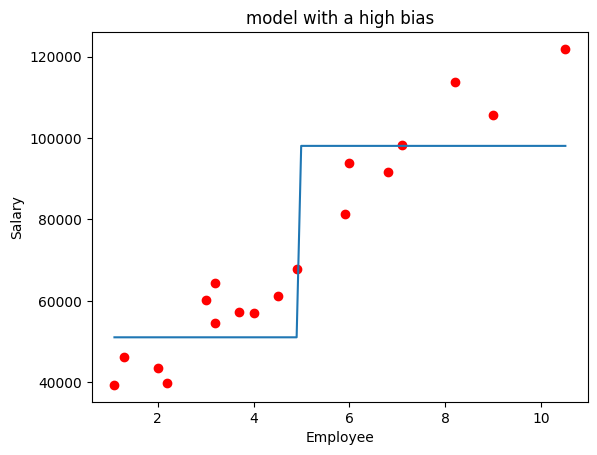

----------------------------------------------


In [ ]:
print('----------------------------------------------')
x=np.linspace(min(x_train),max(x_train),100)
plt.plot(x,regressor.predict(x))
plt.scatter(x_train,y_train,color='red')
plt.xlabel('Employee')
plt.ylabel('Salary')
plt.title('model with a high bias')
plt.show()
print('----------------------------------------------')

# Exercise 6

**Aim :** Write a program to implement Categorical Encoding, One-hot Encoding

**Description :** This code preprocesses a customer dataset by applying Label Encoding and One-Hot Encoding. It loads `customers.csv`, converts categorical columns to numerical labels, explores unique values in `Gender`, and creates binary columns for each gender using both `get_dummies()` and `OneHotEncoder` from `sklearn`, preparing the data for machine learning.

In [ ]:
import numpy as np
import pandas as pd
d=pd.read_csv('customers.csv')
print(d)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
o=OneHotEncoder()
def fun1(df):
  for c in df.columns:
    if df.dtypes[c]=='object':
      df[c]=l.fit_transform(df[c].astype(str))
  return df
print("\n After Label Encoding: \n",fun1(d))

     CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]

 After Label Encoding: 
      CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score
0             1       1   19                  15              39
1             2       1   21            

In [ ]:
import pandas as pd
import numpy as np
d=pd.read_csv('customers.csv')
print(d)
print("\n Unique data")
print(d['Gender'].unique())
print("\n Value counts")
print(d['Gender'].value_counts())
ohe=pd.get_dummies(d,columns=['Gender'])
print("\n After One Hot Encoding")
print(ohe)

     CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]

 Unique data
['Male' 'Female']

 Value counts
Gender
Female    112
Male       88
Name: count, dtype: int64

 After One Hot Encoding
     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Gende

In [ ]:
import pandas as pd
d=pd.read_csv('customers.csv')
print(d)
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(d[['Gender']])
one_hot_df=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(['Gender']))
df_encoded=pd.concat([d,one_hot_df],axis=1)
print(df_encoded)

     CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]
     CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score  \
0             1    Male   19                  15              39   
1             2    Male   21                  15            

# Exercise 7

**Aim :** Build an Artificial Neural Network by implementing the Back propagation algorithm and test the same
using appropriate data sets.

**Description :** This code implements a binary classification model using Keras and Scikit-learn to predict cancer outcomes. It starts by loading a dataset and preprocessing the features, including one-hot encoding for categorical variables and standardizing numerical features. A neural network model is built with two hidden layers and trained on the preprocessed data, ultimately predicting outcomes on the test set.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = pd.read_csv('/content/cancer (1).csv')

# Assuming that the last column is the target variable and rest are features
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode categorical features
ohe = ColumnTransformer([('state', OneHotEncoder(), [3])], remainder='passthrough')
x = ohe.fit_transform(x)

# Check if there are any other non-numeric columns
for i in range(x.shape[1]):
    if isinstance(x[0, i], str):
        le = LabelEncoder()
        x[:, i] = le.fit_transform(x[:, i])

# Convert x to float32
x = x.astype(np.float32)

# Encode the target variable 'y'
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

# Standardize the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)  # Use transform instead of fit_transform for test data

# Build the model
classifier = Sequential()
classifier.add(Dense(units=6, activation='relu', input_dim=x_train.shape[1]))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classifier.fit(x_train, y_train, batch_size=10, epochs=10)

# Make predictions
y_pred = classifier.predict(x_test)
print(y_pred)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5535 - loss: 0.6991
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6467 - loss: 0.6436
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7207 - loss: 0.5863
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7997 - loss: 0.5109
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8784 - loss: 0.4211
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9139 - loss: 0.3411
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9380 - loss: 0.2787
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9608 - loss: 0.2173
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1740
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9695 - loss: 0.1614
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[8.14740241e-01]
 [9.06015635e-01]
 [9.35946703e-01]
 [8.74702752e-01]
 [7.37677336e-01]
 [6.03835955e-02]
 [9.67146516e-01]
 [3.

# Exercise 8

**Aim :** Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set. Print both correct
and wrong predictions.

**Description :** This Python code implements a K-Nearest Neighbors (KNN) classifier to classify iris flower species using the Iris dataset. It starts by importing necessary libraries and loading the dataset into a DataFrame. The features (X) and target variable (Y) are separated, and the data is split into training and testing sets. A KNN classifier with 13 neighbors is trained on the training data. Predictions are made on the test set, and the results are compared with the actual values, displaying whether each prediction is correct or wrong. Finally, it calculates and prints the accuracy and classification report, summarizing the model's performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data = pd.read_csv('iris.csv')
data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
print(X.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=2)
classifier = KNeighborsClassifier(n_neighbors=13).fit(Xtrain, Ytrain)
Ypred = classifier.predict(Xtest)
print(Ypred)

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa']


In [ ]:
print("\nYpred     Ytest         Correct/Wrong\n")

for i in range(0, len(Ypred)):
  if Ypred[i] == Ytest.iloc[i]:
    print(Ypred[i], "     ", Ytest.iloc[i], "     Correct")
  else:
    print(Ypred[i], "     ", Ytest.iloc[i], "     Wrong")


Ypred     Ytest         Correct/Wrong

Iris-setosa       Iris-setosa      Correct
Iris-setosa       Iris-setosa      Correct
Iris-virginica       Iris-virginica      Correct
Iris-setosa       Iris-setosa      Correct
Iris-setosa       Iris-setosa      Correct
Iris-virginica       Iris-virginica      Correct
Iris-setosa       Iris-setosa      Correct
Iris-virginica       Iris-virginica      Correct
Iris-virginica       Iris-virginica      Correct
Iris-setosa       Iris-setosa      Correct
Iris-setosa       Iris-setosa      Correct
Iris-setosa       Iris-setosa      Correct
Iris-setosa       Iris-setosa      Correct
Iris-setosa       Iris-setosa      Correct
Iris-versicolor       Iris-versicolor      Correct
Iris-versicolor       Iris-versicolor      Correct
Iris-setosa       Iris-setosa      Correct
Iris-virginica       Iris-versicolor      Wrong
Iris-virginica       Iris-virginica      Correct
Iris-versicolor       Iris-versicolor      Correct
Iris-versicolor       Iris-versicolor    

In [ ]:
accuracy = metrics.accuracy_score(Ytest, Ypred)
print("Accuracy: ", accuracy)
print("Classification Report:\n",metrics.classification_report(Ytest,Ypred))

Accuracy:  0.9555555555555556
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



# Exercise 9

**Aim :** Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.

**Description :** The shang_regressor function reads a CSV dataset, extracts features (X) and target values (Y), and computes the means for linear regression parameters A0 and A1. It predicts Y values based on the regression line, calculates the mean absolute error (MAE), and visualizes the actual vs. predicted data using a scatter plot.

   X   Y
0  0   3
1  1   5
2  2   8
3  3   9
4  4  11
Mean X =  9.0
Mean Y =  21.157894736842106
Mean X^2 =  111.0
Mean X*Y =  250.26315789473685
Square of meanx =  81.0
Value of A1 =  1.994736842105263
Value of A0 =  3.2052631578947413
Mean Absolute Error =  12.61224668318997


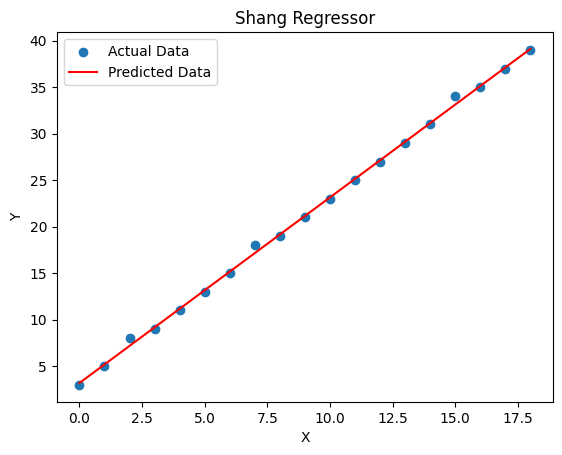

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def shang_regressor(file_path):
    # Dataset loading
    data = pd.read_csv(file_path)
    print(data.head())

    # Converting features into lists
    X = data.iloc[:, :-1].values
    Y = data.iloc[:, -1].values

    # x^2
    squareX = [x**2 for x in X]

    # x*y
    exy = [x * y for x, y in zip(X.flatten(), Y)]

    # Calculating means
    meanx = np.mean(X)
    meany = np.mean(Y)
    meanx2 = np.mean(squareX)
    meanxy = np.mean(exy)
    xmean2 = meanx**2

    print("Mean X = ", meanx)
    print("Mean Y = ", meany)
    print("Mean X^2 = ", meanx2)
    print("Mean X*Y = ", meanxy)
    print("Square of meanx = ", xmean2)

    # Calculating A1 and A0
    A1 = (meanxy - meanx * meany) / (meanx2 - xmean2)
    A0 = meany - A1 * meanx

    print("Value of A1 = ", A1)
    print("Value of A0 = ", A0)

    # Predicting
    predicted_Y = [A0 + A1 * x for x in X]
    mae = np.mean(np.abs(Y - predicted_Y))
    print("Mean Absolute Error = ", mae)

    # Plotting
    plt.scatter(X, Y, label='Actual Data')
    plt.plot(X, predicted_Y, color='red', label='Predicted Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Shang Regressor')
    plt.legend()
    plt.show()

shang_regressor('sample.csv')

# Exercise 10

**Aim :** Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier model to perform
this task. Built-in Java classes/API can be used to write the program. Calculate the accuracy, precision, and
recall for your data set.

**Description :** This code snippet processes a dataset of tweets for sentiment analysis using Python. It reads the data from a CSV file, handles missing values, and transforms categorical labels into numerical values. The tweets are split into training and testing sets, and feature extraction is performed using Count Vectorization. Two classifiers, Naive Bayes and Random Forest, are trained and evaluated on the data, with their accuracy, confusion matrix, and classification reports printed for performance assessment.

In [ ]:
import pandas as pd
from itertools import count
import numpy as np
msg=pd.read_csv('Tweets2.csv',names=['label','message'])

In [ ]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14641 entries, 0 to 14640
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    14641 non-null  object
 1   message  14641 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [ ]:
msg.isnull().sum()

,0
label,0
message,0


In [ ]:
print('The dimensions of dataset of dataset:',msg.shape)
msg['labelnum']=msg.label.map({'positive':+1,'negative':-1,'neutral':0})
X=msg.message
Y=msg.labelnum

The dimensions of dataset of dataset: (14641, 2)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
Y = imputer.fit_transform(Y.values.reshape(-1, 1))

In [ ]:
X

,message
0,text
1,@VirginAmerica What @dhepburn said.
2,@VirginAmerica plus you've added commercials t...
3,@VirginAmerica I didn't today... Must mean I n...
4,@VirginAmerica it's really aggressive to blast...
...,...
14636,@AmericanAir thank you we got on a different f...
14637,@AmericanAir leaving over 20 minutes Late Flig...
14638,@AmericanAir Please bring American Airlines to...
14639,"@AmericanAir you have my money, you change my ..."


In [ ]:
Y

array([[-1.],
       [ 0.],
       [ 1.],
       ...,
       [ 0.],
       [-1.],
       [ 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
X = X.fillna(0)
Y = pd.Series(Y.flatten())
Y = Y.fillna(0)
x_train,x_test,y_train,y_test=train_test_split(X,Y)
print("\n The total number of training data: ",y_train.shape)
print("\n The total number of test data: ",y_test.shape)
print("\n The training data: \n",y_train)
print("\n The test data: \n",y_test)


 The total number of training data:  (10980,)

 The total number of test data:  (3661,)

 The training data: 
 13157    0.0
2505     0.0
6359     1.0
6310    -1.0
10458   -1.0
        ... 
9436    -1.0
12655   -1.0
7895     0.0
233     -1.0
9810    -1.0
Length: 10980, dtype: float64

 The test data: 
 5818    -1.0
3398     1.0
2106     0.0
3935    -1.0
10447    1.0
        ... 
5505     1.0
10988    1.0
11603   -1.0
13249   -1.0
9593    -1.0
Length: 3661, dtype: float64


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
xtrain_dtm=count_vect.fit_transform(x_train)
xtest_dtm=count_vect.transform(x_test)

In [ ]:
print('\n The words or Tokens in the text documents\n')
print(count_vect.get_feature_names_out())
df=pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names_out())


 The words or Tokens in the text documents

['00' '000' '000114' ... 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB().fit(xtrain_dtm,y_train)
predicted=clf.predict(xtest_dtm)

In [ ]:
from sklearn import metrics
print('\n Accuracy of the classifier is',metrics.accuracy_score(y_test,predicted))


 Accuracy of the classifier is 0.7620868615132478


In [ ]:
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))

[[2246   62   23]
 [ 439  273   38]
 [ 244   65  271]]
              precision    recall  f1-score   support

        -1.0       0.77      0.96      0.85      2331
         0.0       0.68      0.36      0.47       750
         1.0       0.82      0.47      0.59       580

    accuracy                           0.76      3661
   macro avg       0.76      0.60      0.64      3661
weighted avg       0.76      0.76      0.74      3661



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(xtrain_dtm,y_train)
y_pred_rf=rnd_clf.predict(xtest_dtm)

In [ ]:
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test,y_pred_rf))
print(metrics.accuracy_score(y_test,y_pred_rf))

[[2331    0    0]
 [ 750    0    0]
 [ 580    0    0]]
              precision    recall  f1-score   support

        -1.0       0.64      1.00      0.78      2331
         0.0       0.00      0.00      0.00       750
         1.0       0.00      0.00      0.00       580

    accuracy                           0.64      3661
   macro avg       0.21      0.33      0.26      3661
weighted avg       0.41      0.64      0.50      3661

0.6367112810707457


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Exercise 11

**Aim :** Apply EM algorithm to cluster a Heart Disease Data Set. Use the same data set for
clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the
quality of clustering. You can add Java/Python ML library classes/API in the program.

**Description :** This code performs clustering analysis on a heart disease dataset using K-Means and Gaussian Mixture Models (GMM). It begins by importing necessary libraries and loading the dataset from a URL. The data is preprocessed by handling missing values and scaling features. Both clustering algorithms are applied, and their silhouettes scores are calculated to evaluate clustering quality. Finally, it visualizes the clustering results using scatter plots for both K-Means and GMM.

K-Means Silhouette Score: 0.17511353215805028
GMM Silhouette Score: 0.15968887245939664


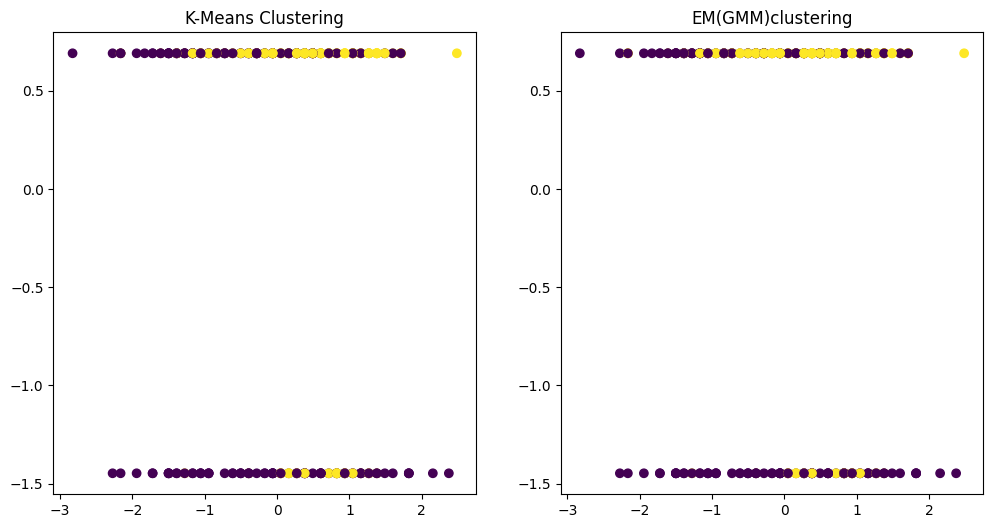

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
url="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
data=pd.read_csv(url,names=names,na_values='?')
data=data.dropna()
X=data.drop('target',axis=1)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_scaled)
kmeans_labels=kmeans.fit_predict(X_scaled)
gmm=GaussianMixture(n_components=2,random_state=42)
gmm.fit(X_scaled)
gmm_labels=gmm.predict(X_scaled)
kmeans_silhouette=silhouette_score(X_scaled,kmeans_labels)
gmm_silhouette=silhouette_score(X_scaled,gmm_labels)
print("K-Means Silhouette Score:",kmeans_silhouette)
print("GMM Silhouette Score:",gmm_silhouette)
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(X_scaled[:,0],X_scaled[:,1],c=kmeans_labels,cmap='viridis',marker='o')
ax[0].set_title("K-Means Clustering")
ax[1].scatter(X_scaled[:,0],X_scaled[:,1],c=gmm_labels,cmap='viridis',marker='o')
ax[1].set_title("EM(GMM)clustering")
plt.show()

# Exercise 12


**Aim :**  Exploratory Data Analysis for Classification using Pandas or Matplotlib.

**Description :** This code snippet demonstrates exploratory data analysis (EDA) on the Iris dataset using Python libraries. It imports the dataset, visualizes class distribution, generates histograms, boxplots, and a correlation heatmap, and creates pair plots to explore relationships between features. Standardization is performed using `StandardScaler`, and categorical variables are encoded for further analysis. The code also reads an external CSV file for additional insights.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

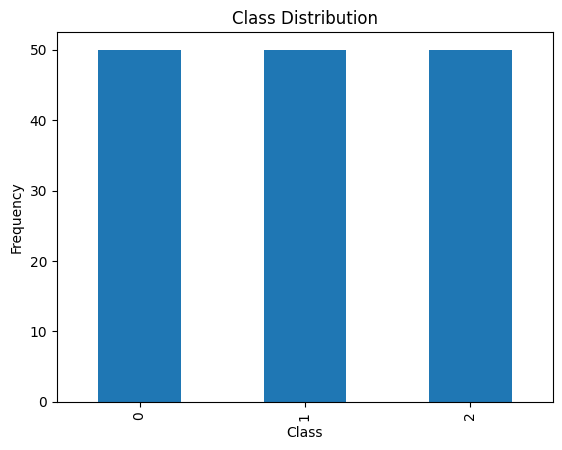

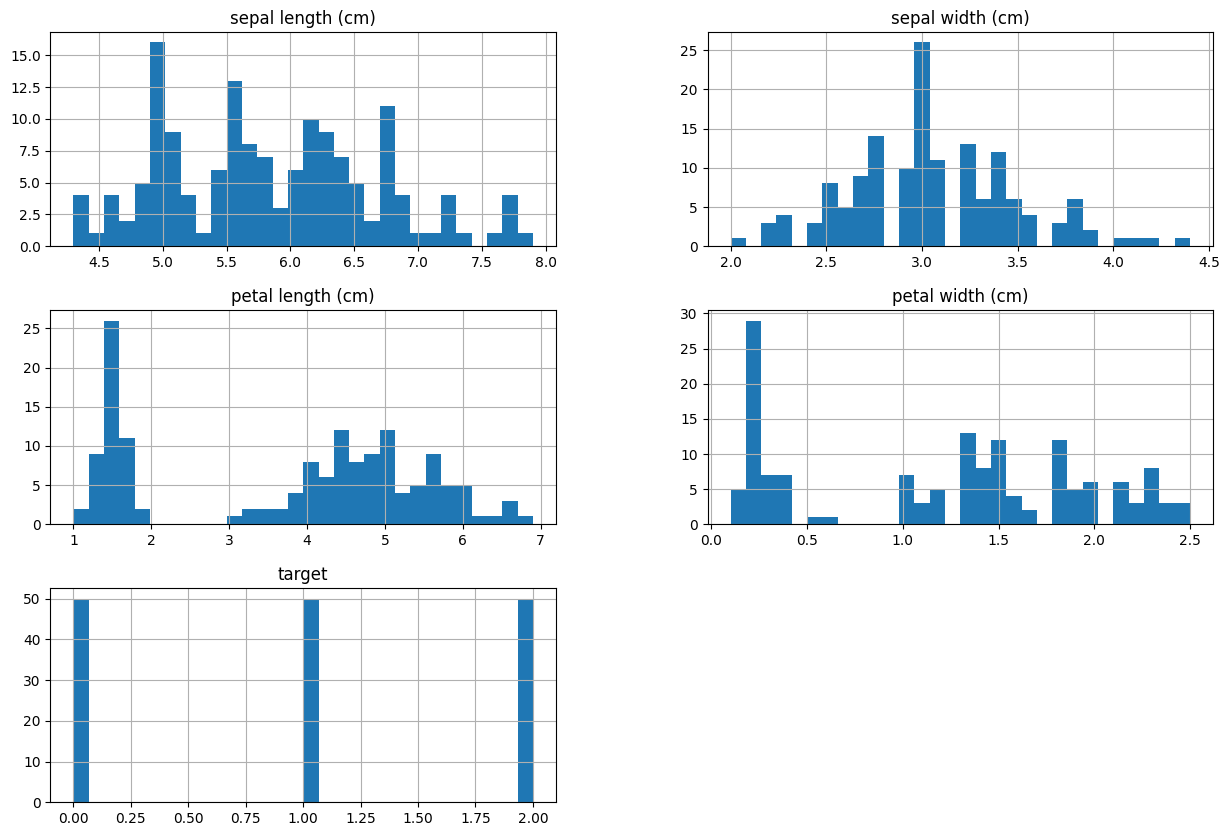

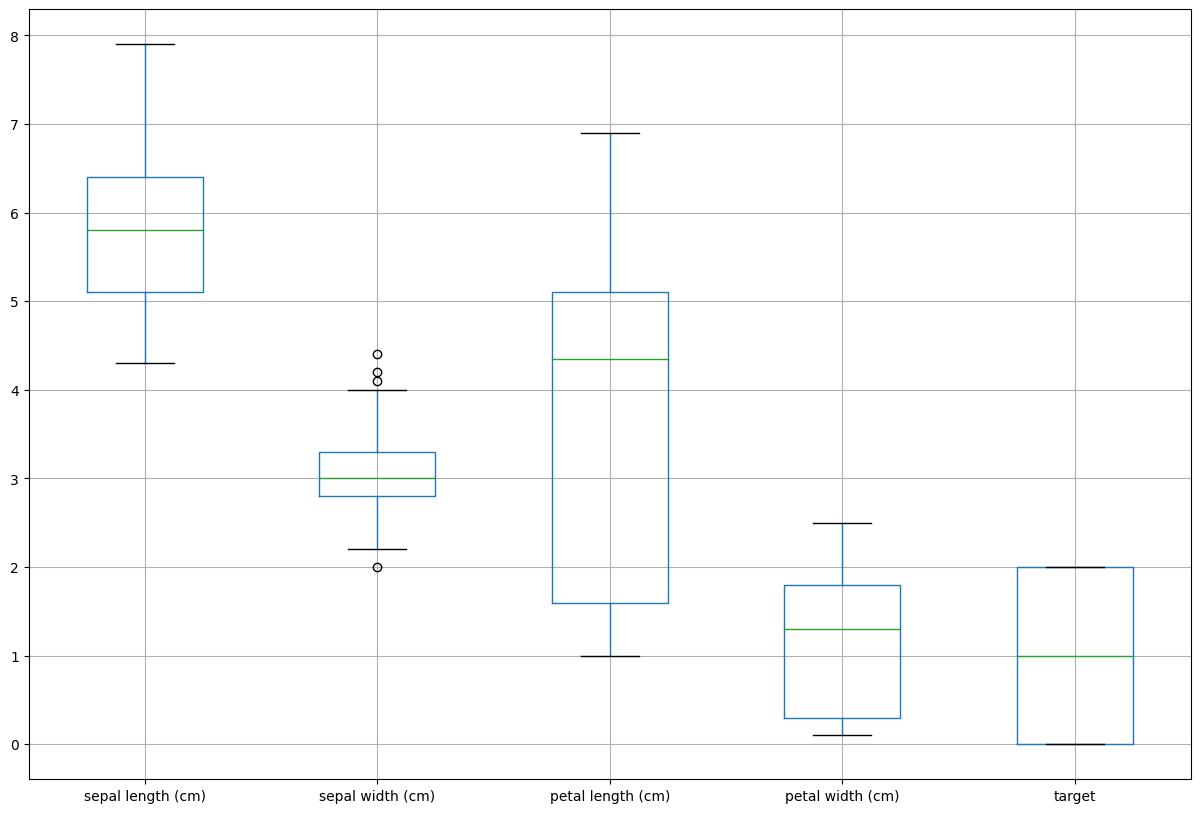

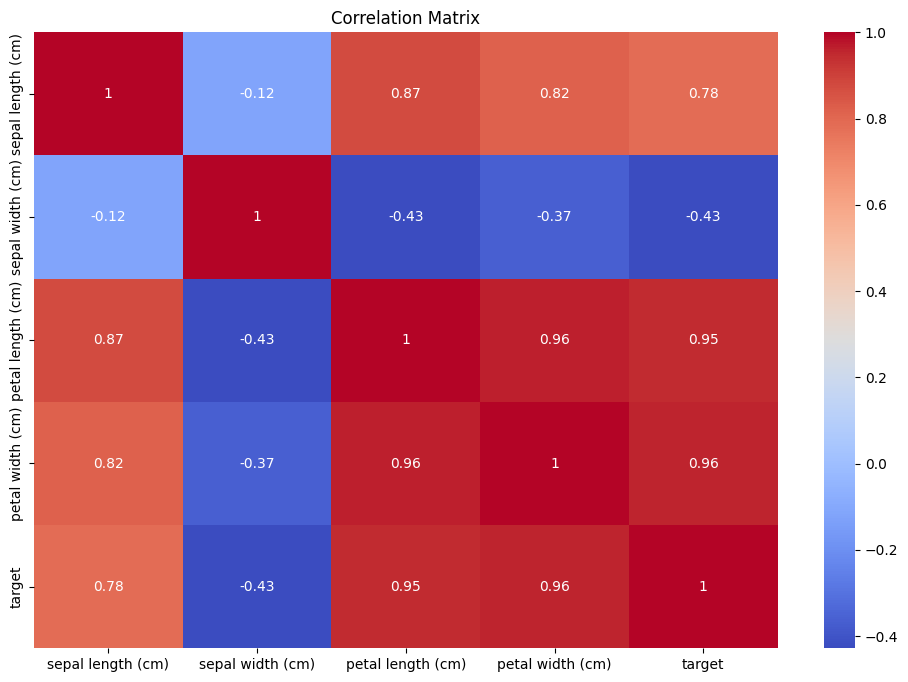

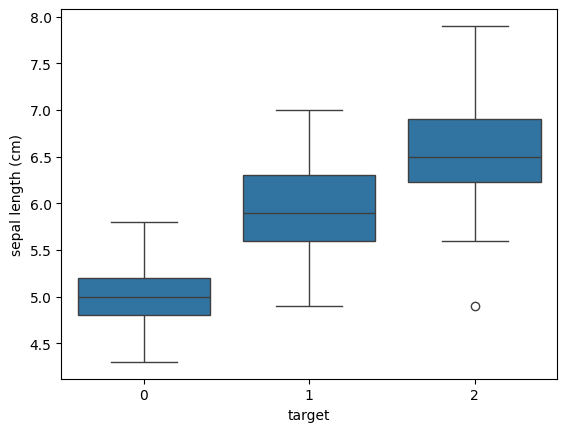

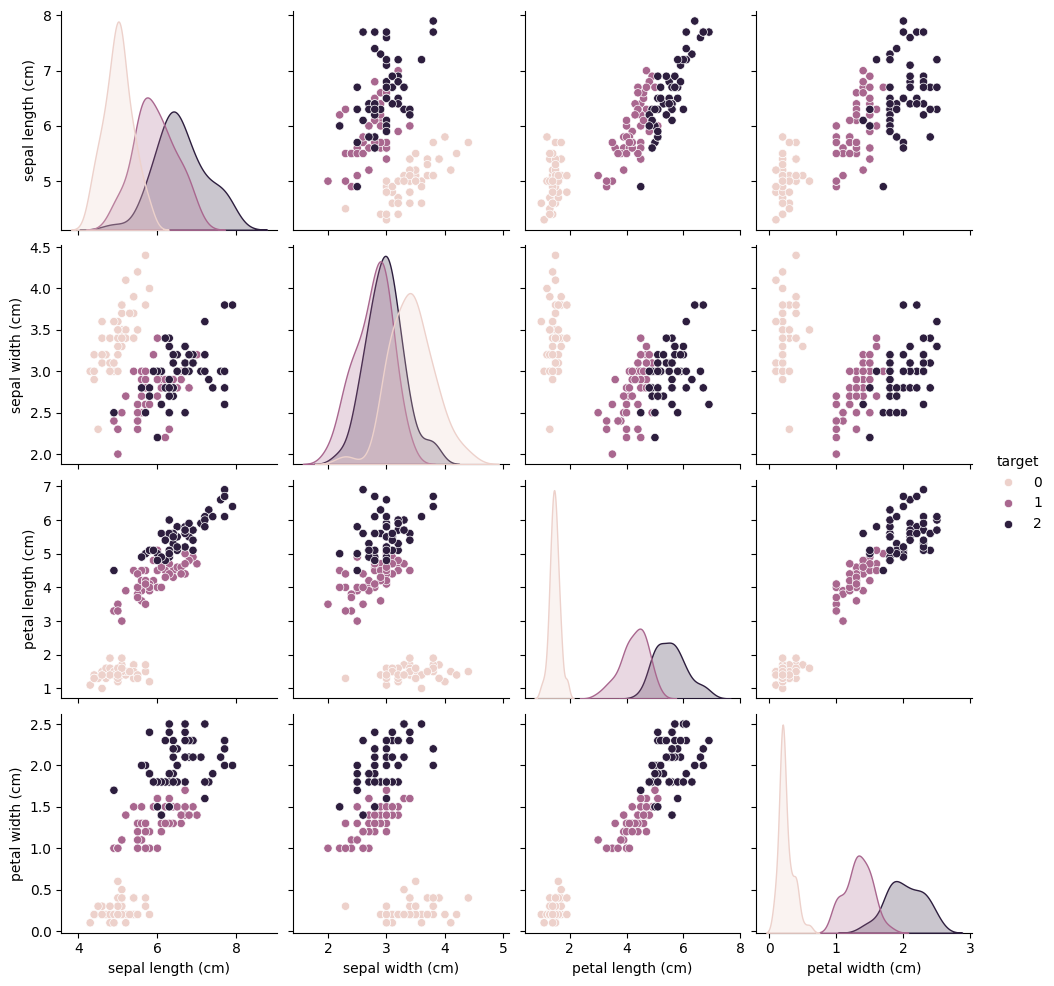

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

print(data.head())
print(data.describe())
print(data.isnull().sum())
print(data.info())

print(data['target'].value_counts())
data['target'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

data.hist(bins=30, figsize=(15, 10))
plt.show()

data.boxplot(figsize=(15, 10))
plt.show()

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.boxplot(x='target', y='sepal length (cm)', data=data)
plt.show()

sns.pairplot(data, hue='target', diag_kind='kde')
plt.show()

data_encoded = pd.get_dummies(data, drop_first=True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('iris.csv')
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


[[<Axes: title={'center': 'Id'}>
  <Axes: title={'center': 'SepalLengthCm'}>]
 [<Axes: title={'center': 'SepalWidthCm'}>
  <Axes: title={'center': 'PetalLengthCm'}>]
 [<Axes: title={'center': 'PetalWidthCm'}> <Axes: >]]


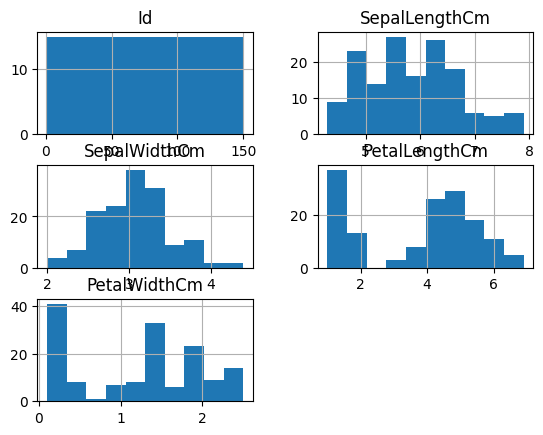

In [ ]:
print(data.hist())
plt.show()

# Exercise 13

**Aim :** Write a Python program to construct a Bayesian network considering medical data. Use this model to
demonstrate the diagnosis of heart patients using standard Heart Disease Data Set

**Description :** This code uses the `pgmpy` library to build and analyze a Bayesian Network model for heart disease prediction. It begins by loading a dataset from `heartdisease.csv` into a pandas DataFrame. The network defines relationships between variables like age, gender, and lifestyle. It fits the model using Maximum Likelihood Estimation and performs inference to query the probability of heart disease based on given evidence (age and diet). Finally, it prints the results of these queries, providing insights into the impact of these factors on heart disease risk.

In [ ]:
!pip install pgmpy requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data=pd.read_csv('heartdisease.csv')
heart_disease=pd.DataFrame(data)
print(heart_disease)

    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1           0          

In [ ]:
from pgmpy.models import BayesianNetwork
model=BayesianNetwork([
    ('age','Lifestyle'),
     ('Gender','Lifestyle'),
     ('Family','heartdisease'),
      ('diet','cholestrol'),
       ('Lifestyle','diet'),
        ('cholestrol','heartdisease'),
         ('diet','cholestrol')
         ])

from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(heart_disease,estimator=MaximumLikelihoodEstimator)

from pgmpy.inference import VariableElimination
HeartDisease_infer=VariableElimination(model)

In [ ]:
q=HeartDisease_infer.query(variables=['heartdisease'],evidence={'age':4},joint=False)
print(q['heartdisease'])

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.4189 |
+-----------------+---------------------+
| heartdisease(1) |              0.5811 |
+-----------------+---------------------+


In [ ]:
q=HeartDisease_infer.query(variables=['heartdisease'],evidence={'age':0,'diet':1},joint=False)
print(q['heartdisease'])

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3732 |
+-----------------+---------------------+
| heartdisease(1) |              0.6268 |
+-----------------+---------------------+


In [ ]:
print('For age Enter{SuperSeniorCitizen:0,SeniorCitizen:1,MiddleAged:2,Youth:3,Teen:4}')
print('For Gender Enter{Male:0,Female:1}')
print('For Family History Enter{Yes:1,No:0}')
print('For Diet Enter{High:0,Medium:1}')
print('For LifeStyle Enter{Athlete:0,Active:1,Moderate:2,Sedetary:3}')
print('For Cholesterol Enter{High:0,BorderLine:1,Normal:2}')


q=HeartDisease_infer.query(variables=['heartdisease'],evidence={
    'age':int(input('Enter Age:')),
    'Gender':int(input('Enter Gender:')),
    'Family':int(input('Enter Family History:')),
    'diet':int(input('Enter Diet:')),
    'Lifestyle':int(input('Enter Lifestyle:')),
    'cholestrol':int(input('Enter Cholestrol:'))
    },joint=False)
print(q['heartdisease'])

For age Enter{SuperSeniorCitizen:0,SeniorCitizen:1,MiddleAged:2,Youth:3,Teen:4}
For Gender Enter{Male:0,Female:1}
For Family History Enter{Yes:1,No:0}
For Diet Enter{High:0,Medium:1}
For LifeStyle Enter{Athlete:0,Active:1,Moderate:2,Sedetary:3}
For Cholesterol Enter{High:0,BorderLine:1,Normal:2}
Enter Age:0
Enter Gender:1
Enter Family History:1
Enter Diet:1
Enter Lifestyle:1
Enter Cholestrol:1
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              1.0000 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+


# Exercise 14a

**Aim :** Write a program to Implement Support Vector Machines

**Description :** This code implements a Support Vector Machine (SVM) classifier on the Iris dataset. It imports necessary libraries and loads the dataset, creating a DataFrame with features and target labels. After splitting the data into training and testing sets, it standardizes the features. The SVM model is trained with a linear kernel, and predictions are evaluated using a confusion matrix, classification report, and accuracy score.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
iris=datasets.load_iris()
X=iris.data
Y=iris.target

In [ ]:
df=pd.DataFrame(data=X,columns=iris.feature_names)
df['target']=Y
df['species']=df['target'].apply(lambda x:iris.target_names[x])

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [ ]:
X=df.iloc[:,:-2].values
y=df['target'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
svm_classifier=SVC(kernel='linear',random_state=42)

svm_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred=svm_classifier.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))

print("\nClassification report:")
print(classification_report(y_test,y_pred))

print("\nAccuracy:",accuracy_score(y_test,y_pred))

Confusion matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Accuracy: 0.9666666666666667


# Exercise 14b

**Aim :** Write a program to Implement Principle Component Analysis

**Description :** This code performs Principal Component Analysis (PCA) on the Iris dataset to reduce its dimensionality from four features to two principal components. It begins by loading and standardizing the data, then applies PCA to extract the two components. The results are visualized in a scatter plot, where each point represents a flower species in the reduced dimension. Finally, it displays the explained variance ratio of the components, indicating how much variance each principal component captures from the original data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Loading and Labelling datasets
iris=datasets.load_iris()
X=iris.data
Y=iris.target
target_names=iris.target_names

In [ ]:
#Standardizing the data
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [ ]:
#Apply PCA
pca=PCA(n_components=2)
principal_components=pca.fit_transform(X_std)

In [ ]:
df_pca=pd.DataFrame(data=principal_components,columns=['PC1','PC2'])
df_pca['target']=Y

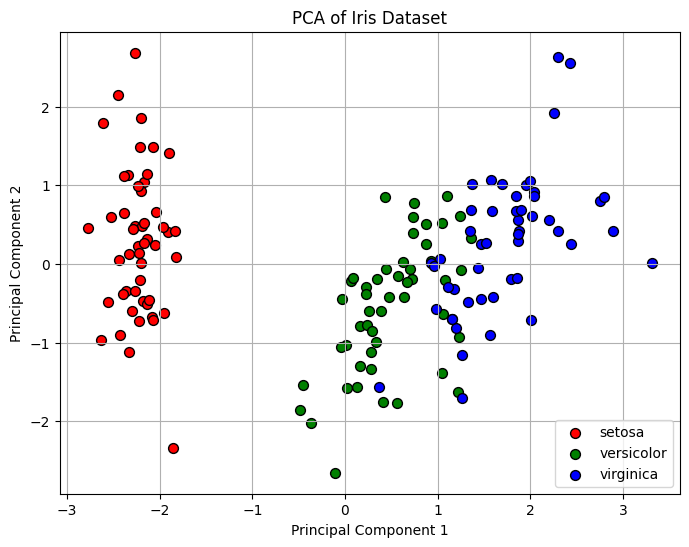

In [ ]:
#Visualize the PCA results
plt.figure(figsize=(8,6))
colors=['r','g','b']
for target,color,label in zip([0,1,2],colors,target_names):
  plt.scatter(df_pca[df_pca['target']==target]['PC1'],
              df_pca[df_pca['target']==target]['PC2'],
              c=color,label=label,edgecolors='k',s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('Explained Variance Ratio:',pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72962445 0.22850762]


# Exercise 15

**Aim :** Write a program to Implement Principle Component Analysis

**Description :** This code performs PCA from scratch on the Iris dataset, standardizing features, computing the covariance matrix, and extracting the top two principal components. It visualizes both the PCA results and original data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()
X=iris.data
Y=iris.target
target_names=iris.target_names

In [ ]:
X_mean=np.mean(X,axis=0)
X_centered=X-X_mean
std_dev=np.std(X_centered,axis=0)
X_std=X_centered/std_dev

In [ ]:
cov_matrix=np.cov(X_std.T)
eigenvalues,eigenvectors=np.linalg.eig(cov_matrix)

In [ ]:
sorted_idx=np.argsort(eigenvalues)[::-1]
eigen_values_sorted=eigenvalues[sorted_idx]
eigen_vectors_sorted=eigenvectors[:,sorted_idx]

In [ ]:
n_components=2
eigen_vectors_subset=eigen_vectors_sorted[:,:n_components]

In [ ]:
X_pca=np.dot(X_std,eigen_vectors_subset)

In [ ]:
df_pca=pd.DataFrame(data=X_pca,columns=['PC1','PC2'])
df_pca['target']=Y

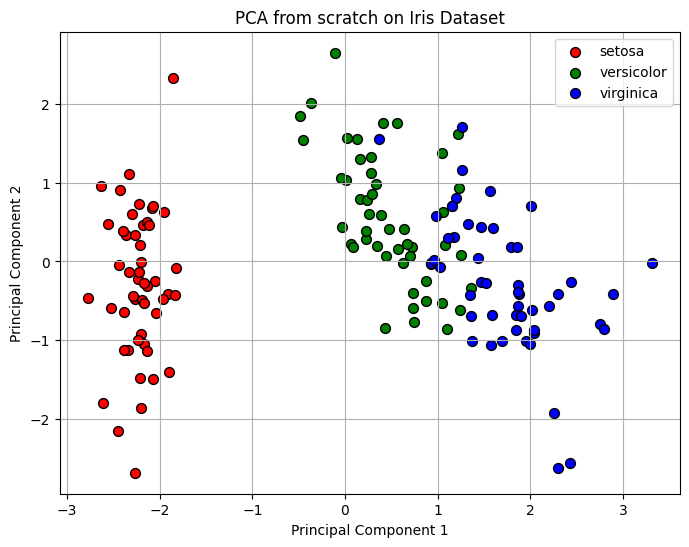

In [ ]:
plt.figure(figsize=(8,6))
colors=['r','g','b']
for target,color,label in zip([0,1,2],colors,target_names):
  plt.scatter(df_pca[df_pca['target']==target]['PC1'],
              df_pca[df_pca['target']==target]['PC2'],
              c=color,label=label,edgecolors='k',s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA from scratch on Iris Dataset')
plt.legend()
plt.grid()
plt.show()

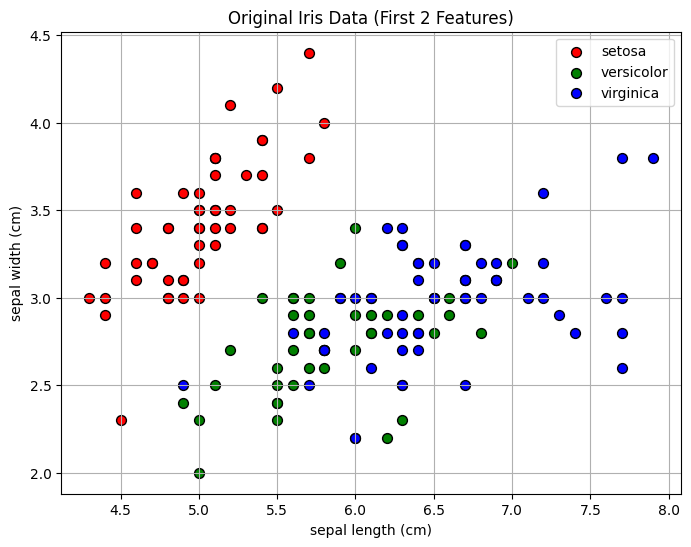

In [ ]:
plt.figure(figsize=(8,6))
for target, color, label in zip([0, 1, 2], colors, target_names):
    plt.scatter(X[Y == target, 0],
                X[Y == target, 1],
                c=color, label=label, edgecolors='k', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Original Iris Data (First 2 Features)')
plt.legend()
plt.grid()
plt.show()